# HEALTH FACILITIES DISTRIBUTION

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("\\Users\\Cheryl\\Documents\\Python Scripts\\Dalberg Insights\\ehealth-kenya-facilities.xls")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
df.shape: (10505, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9613 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-n

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# create wrangle function
def wrangle (filepath):
    
    # read xlsx file into dataframe
    df = pd.read_excel(filepath) 
    
    # subset health facilities in "Nairobi"
    mask_nairobi = df["Province"].str.contains("Nairobi")
    
    # identify and drop leaky columns
    drop_cols = ["Sub Location", "Description of Location", "Constituency", "Nearest Town", "Beds", "Cots", "Official Landline",
                 "Official Fax", "Official Mobile", "Official Email", "Official Address", "Official Alternate No", "Town", 
                 "Post Code", "In Charge", "Job Title of in Charge", "ANC", "ART", "BEOC", "BLOOD", "CAES SEC", "CEOC", "C-IMCI",
                 "EPI", "FP", "GROWM", "HBC", "HCT", "IPD", "OPD", "OUTREACH", "PMTCT", "RAD/XRAY", "RHTC/RHDC", "TB DIAG", 
                 "TB LABS", "TB TREAT", "YOUTH"]
    
    df.drop(columns = drop_cols, inplace=True)
    
    df = df[mask_nairobi]
     
    return df

In [4]:
df = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Dalberg Insights\\ehealth-kenya-facilities.xls")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head() 

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
df.shape: (942, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1 to 10496
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Facility Code       942 non-null    int64 
 1   Facility Name       942 non-null    object
 2   Province            942 non-null    object
 3   County              942 non-null    object
 4   District            942 non-null    object
 5   Division            914 non-null    object
 6   Type                942 non-null    object
 7   Owner               942 non-null    object
 8   Location            894 non-null    object
 9   Open 24 Hours       931 non-null    object
 10  Open Weekends       933 non-null    object
 11  Operational Status  942 non-null    object
dtypes: int64(1), object(11)
memory usage: 95.7+ KB
df.info: None


,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Open 24 Hours,Open Weekends,Operational Status
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,N,Y,Operational
7,13043,7Kr Mrs Health Centre,Nairobi,Nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Y,Y,Operational
10,20346,AAR Adams Health Centre,Nairobi,Nairobi,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,N,Y,Operational
11,12861,AAR City Centre Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,N,Y,Operational
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,N,N,Operational


In [5]:
df["Facility Code"].nunique()

942

In [6]:
df["District"].nunique()

17

In [7]:
df["District"].value_counts()

Starehe             136
Kibra                93
Roysambu             83
Dagoretti North      76
Westlands            72
Langata              61
Kamukunji            59
Kasarani             58
Makadara             55
Embakasi Central     44
Embakasi West        40
Ruaraka              40
Dagoretti South      29
Embakasi East        27
Embakasi South       27
Embakasi North       26
Mathare              16
Name: District, dtype: int64

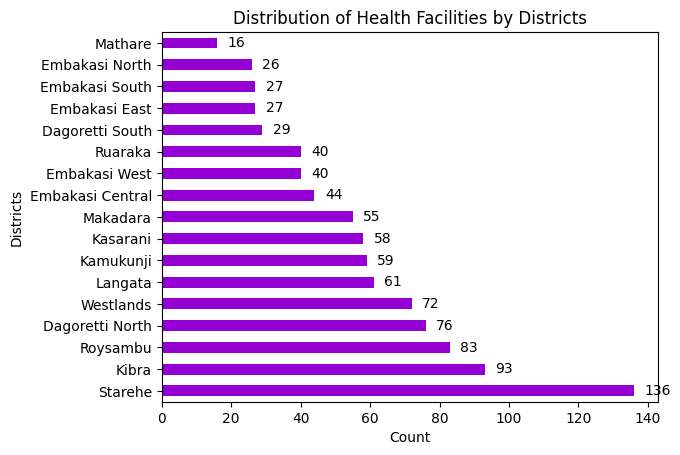

In [8]:
# Create a set of colors
colors = ["#E6E6FA","#D8BFD8","#DDA0DD","#EE82EE","#DA70D6","#FF00FF","#BA55D3","#9370DB","#663399", "#800080", "#483D8B"]

# Plot the horizontal bar chart
ax = df["District"].value_counts().plot(
    kind="barh", 
    color="#9400D3",
    xlabel="Count", 
    ylabel="Districts", 
    title="Distribution of Health Facilities by Districts")

# Add labels on the bars
for i, v in enumerate(df["District"].value_counts()):
    ax.text(v + 3, i, str(v), color="black", va="center")

plt.show()

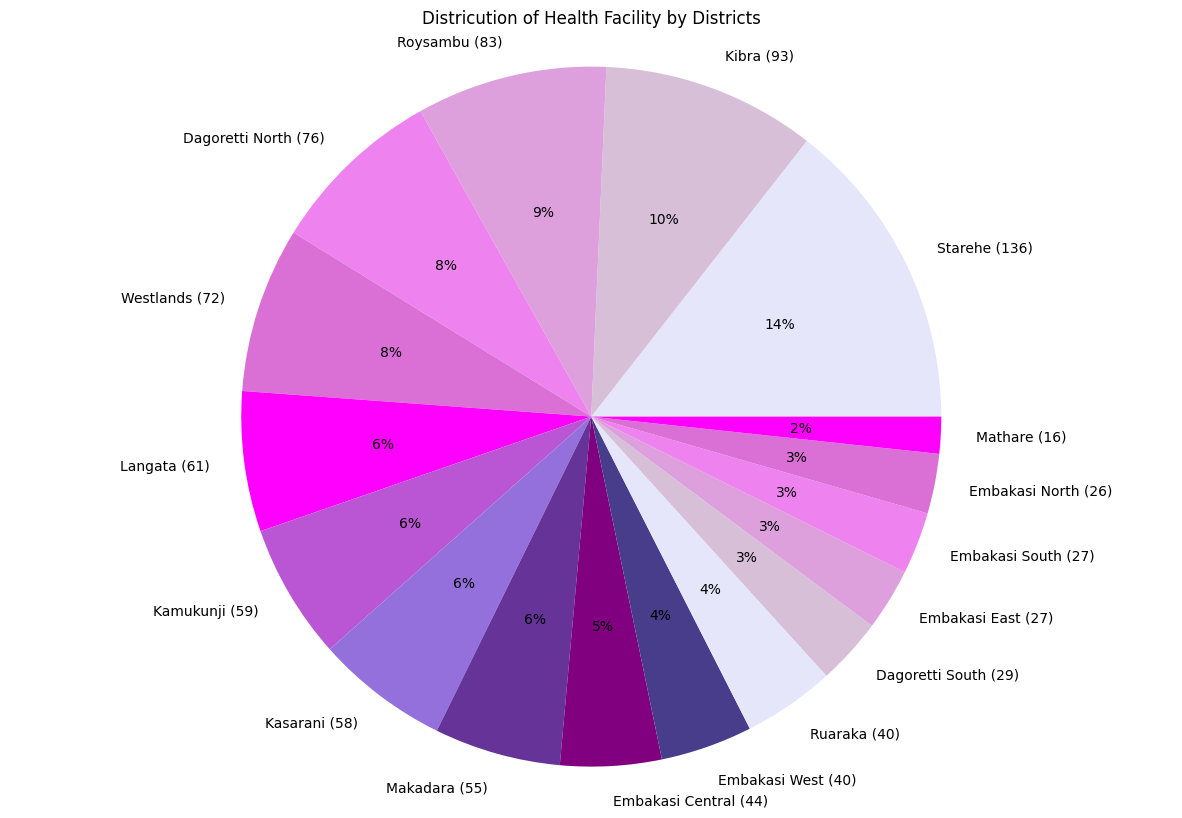

In [9]:
# create value counts for "District"
district_count = df["District"].value_counts()

# Plot pie chart
plt.figure(figsize=(15,10))
plt.pie(district_count, labels=[f"{label} ({count})" for label, count in zip(district_count.index, district_count)], autopct='%1.0f%%', colors=colors)
plt.title("Districution of Health Facility by Districts")
plt.axis("equal")  
plt.show()

In [10]:
df["Type"].value_counts()

Medical Clinic                                  460
Dispensary                                      199
Health Centre                                    88
VCT Centre (Stand-Alone)                         56
Other Hospital                                   41
Nursing Home                                     25
Maternity Home                                   15
Laboratory (Stand-alone)                         13
Medical Centre                                   12
Dental Clinic                                    10
Health Programme                                  5
Training Institution in Health (Stand-alone)      4
Health Project                                    3
District Hospital                                 3
National Referral Hospital                        2
Eye Centre                                        2
District Health Office                            1
Eye Clinic                                        1
Radiology Unit                                    1
Sub-District

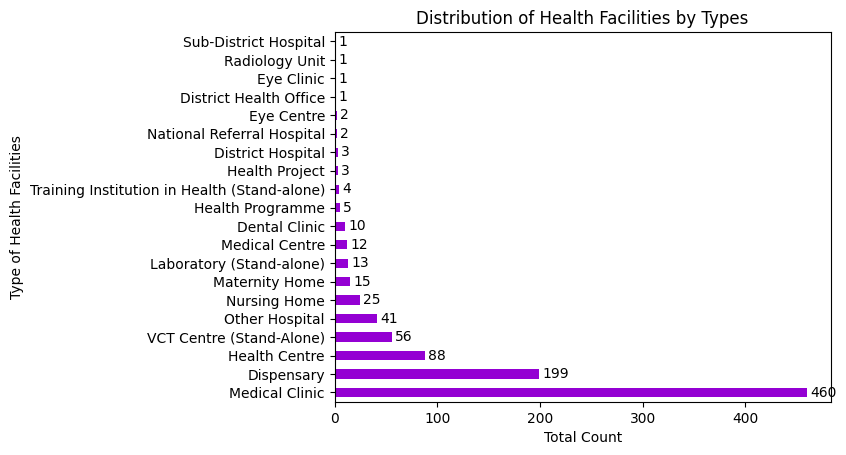

In [11]:
# Plot the horizontal bar chart
ax = df["Type"].value_counts().plot(
    kind="barh", 
    color="#9400D3",
    xlabel="Total Count", 
    ylabel="Type of Health Facilities", 
    title="Distribution of Health Facilities by Types")

# Add labels on the bars
for i, v in enumerate(df["Type"].value_counts()):
    ax.text(v + 3, i, str(v), color="black", va="center")

plt.show()

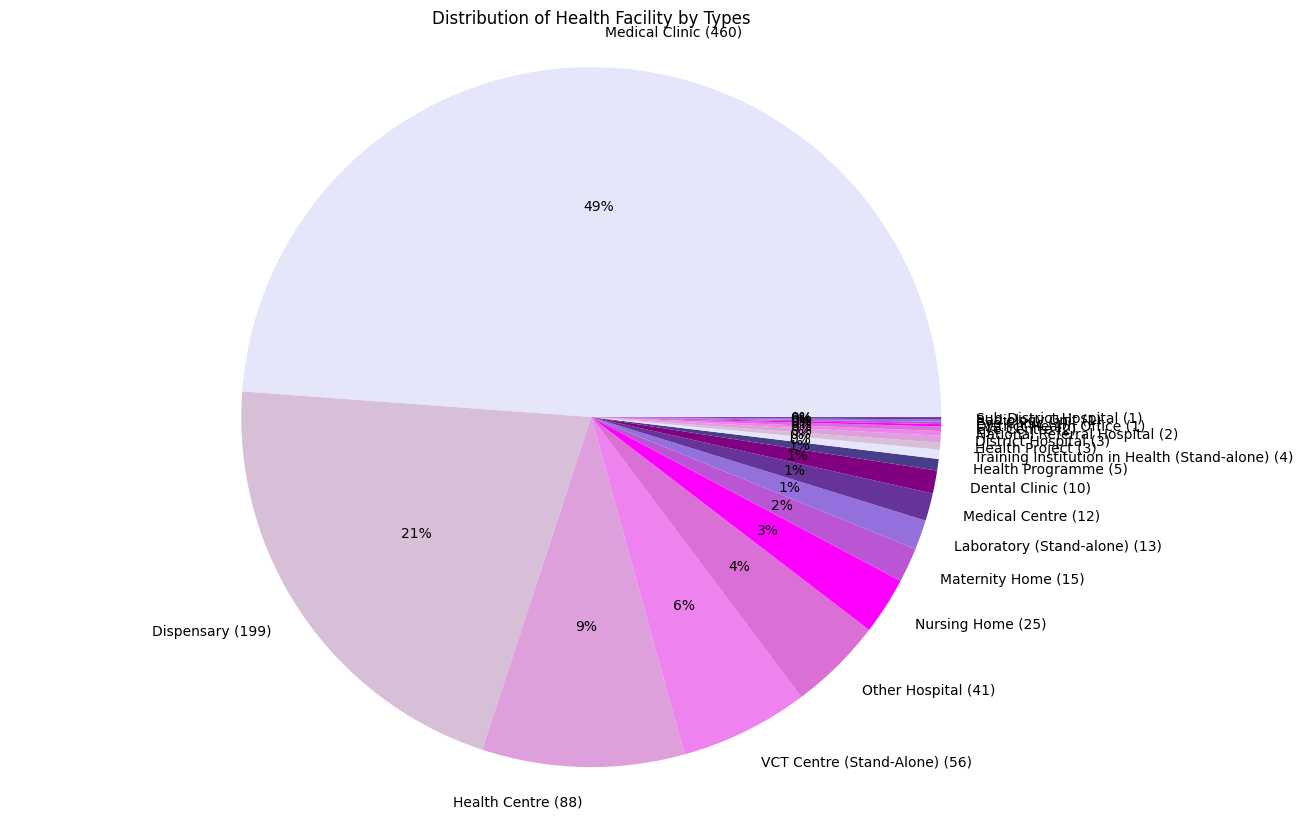

In [12]:
# create value counts for "Type"
type_count = df["Type"].value_counts()

# Plot pie chart
plt.figure(figsize=(15,10))
plt.pie(type_count, labels=[f"{label} ({count})" for label, count in zip(type_count.index, type_count)], autopct="%1.0f%%", colors=colors)
plt.title("Distribution of Health Facility by Types")
plt.axis("equal")  
plt.show()

In [13]:
df["Owner"].value_counts()

Private Enterprise (Institution)                   219
Private Practice - General Practitioner            161
Non-Governmental Organizations                     116
Private Practice - Unspecified                      63
Local Authority                                     58
Ministry of Health                                  56
Kenya Episcopal Conference-Catholic Secretariat     49
Private Practice - Nurse / Midwife                  40
Private Practice - Clinical Officer                 39
Private Practice - Medical Specialist               34
Other Faith Based                                   26
Christian Health Association of Kenya               24
Other Public Institution                            13
Community                                           11
Armed Forces                                         9
Parastatal                                           7
Academic (if registered)                             6
Company Medical Service                              3
Humanitari

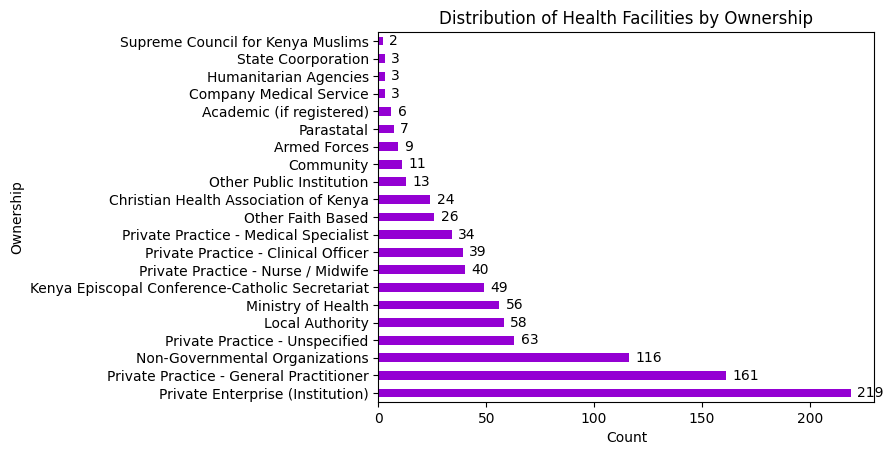

In [14]:
# Plot the horizontal bar chart
ax = df["Owner"].value_counts().plot(
    kind="barh",
    color="#9400D3",
    xlabel="Count", 
    ylabel="Ownership", 
    title="Distribution of Health Facilities by Ownership")

# Add labels on the bars
for i, v in enumerate(df["Owner"].value_counts()):
    ax.text(v + 3, i, str(v), color="black", va="center")

plt.show()

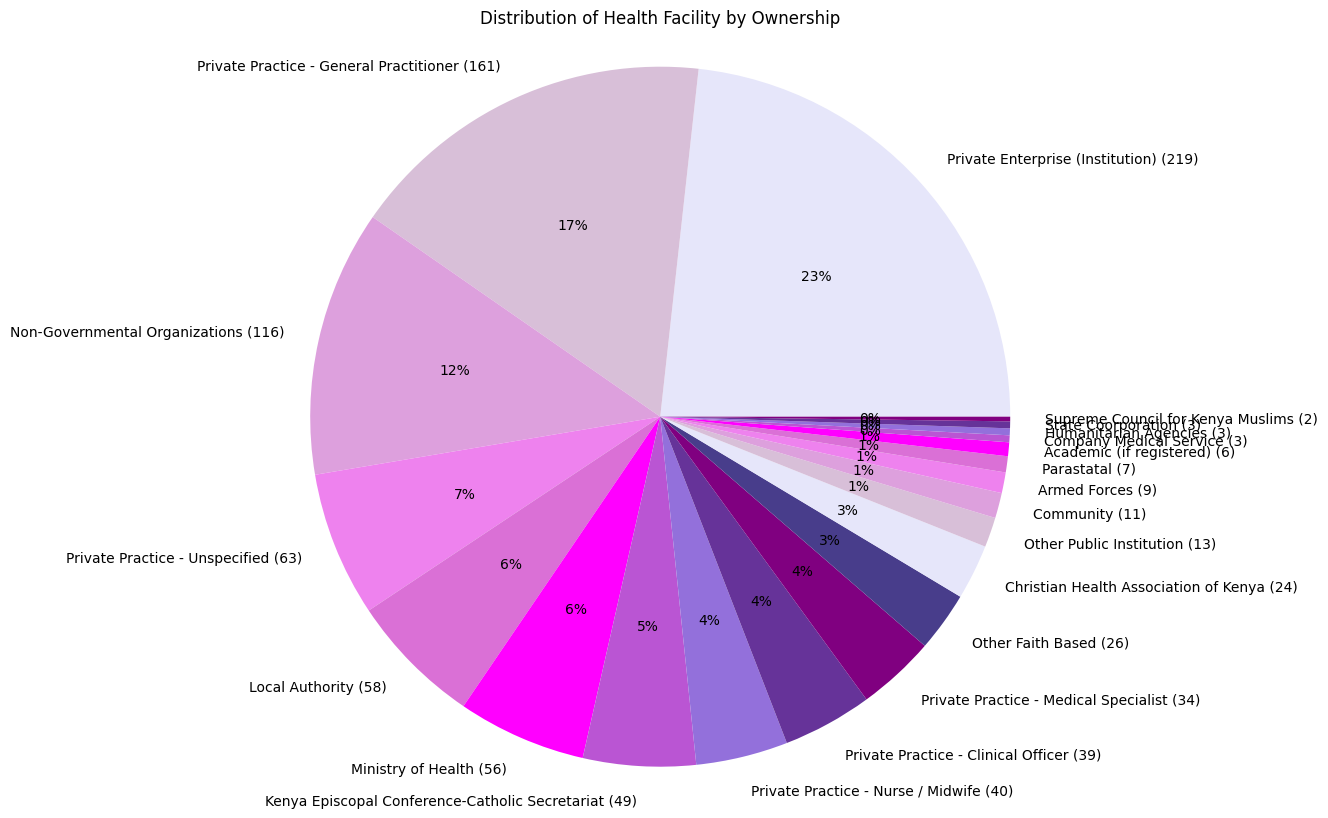

In [15]:
# create value counts for "Owner"
owner_count = df["Owner"].value_counts()

# Plot pie chart
plt.figure(figsize=(15,10))
plt.pie(owner_count, labels=[f"{label} ({count})" for label, count in zip(owner_count.index, owner_count)], autopct="%1.0f%%", colors=colors)
plt.title("Distribution of Health Facility by Ownership")
plt.axis("equal")  
plt.show()

In [16]:
df["Owner"].str.contains("Private").value_counts()

True     556
False    386
Name: Owner, dtype: int64

In [17]:
df["Owner"].unique()

array(['Private Practice - Unspecified', 'Armed Forces',
       'Private Practice - General Practitioner',
       'Private Enterprise (Institution)',
       'Private Practice - Medical Specialist',
       'Private Practice - Nurse / Midwife',
       'Non-Governmental Organizations',
       'Kenya Episcopal Conference-Catholic Secretariat',
       'Academic (if registered)', 'Local Authority',
       'Ministry of Health', 'Parastatal', 'Other Faith Based',
       'Private Practice - Clinical Officer', 'Community',
       'Other Public Institution', 'Company Medical Service',
       'Humanitarian Agencies', 'Christian Health Association of Kenya',
       'State Coorporation', 'Supreme Council for Kenya Muslims'],
      dtype=object)

In [18]:
df["Owner"].value_counts()

Private Enterprise (Institution)                   219
Private Practice - General Practitioner            161
Non-Governmental Organizations                     116
Private Practice - Unspecified                      63
Local Authority                                     58
Ministry of Health                                  56
Kenya Episcopal Conference-Catholic Secretariat     49
Private Practice - Nurse / Midwife                  40
Private Practice - Clinical Officer                 39
Private Practice - Medical Specialist               34
Other Faith Based                                   26
Christian Health Association of Kenya               24
Other Public Institution                            13
Community                                           11
Armed Forces                                         9
Parastatal                                           7
Academic (if registered)                             6
Company Medical Service                              3
Humanitari

In [19]:
# Define the replacement dictionary
replacement_dict = {
    "Private Practice - General Practitioner" : "Private",
    "Non-Governmental Organizations" : "Non-Governmental Organization",
    "Private Practice - Unspecified" : "Private",
    "Local Authority" : "Government/Public Entity",
    "Ministry of Health" : "Government/Public Entity",
    "Kenya Episcopal Conference-Catholic Secretariat" : "Non-Governmental Organization",
    "Private Practice - Nurse / Midwife" : "Private",
    "Private Practice - Clinical Officer" : "Private",
    "Private Practice - Medical Specialist" : "Private",
    "Other Faith Based" : "Non-Governmental Organization",
    "Christian Health Association of Kenya" : "Non-Governmental Organization",
    "Other Public Institution" : "Government/Public Entity",
    "Community" : "Government/Public Entity",
    "Armed Forces" : "Government/Public Entity",
    "Parastatal": "Government/Public Entity",
    "Company Medical Service" : "Government/Public Entity",
    "Humanitarian Agencies" : "Non-Governmental Organization",
    "State Coorporation" : "Government/Public Entity",
    "Supreme Council for Kenya Muslims" : "Government/Public Entity"   
}

# Replace the values in the "Owner" column
df["Owner"] = df["Owner"].replace(replacement_dict, regex=True)

In [20]:
# Define the replacement dictionary
replacement_dict = {
    "Private Enterprise (Institution)": "Private"
}

# Replace the values in the "Owner" column
df["Owner"].replace(replacement_dict, inplace=True)

In [21]:
# Define the replacement dictionary
replacement_dict = {
    "Academic (if registered)" : "Government/Public Entity"
}

# Replace the values in the "Owner" column
df["Owner"].replace(replacement_dict, inplace=True)

In [22]:
df["Owner"].nunique()

3

In [23]:
df["Owner"].value_counts()

Private                          556
Non-Governmental Organization    218
Government/Public Entity         168
Name: Owner, dtype: int64

Text(0, 0.5, 'Frequency')

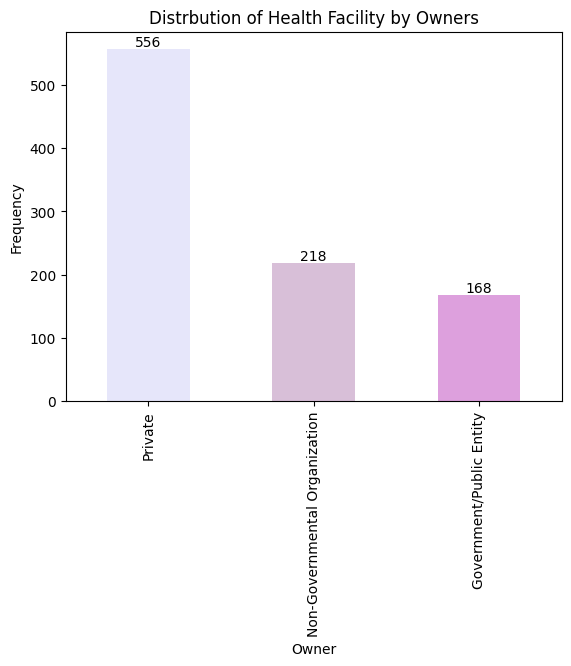

In [24]:
# Create the bar plot
ax = df["Owner"].value_counts().plot(kind="bar", color=colors)

# Add labels to each bar
for i in ax.patches:
    # Get the height of the bar
    height = i.get_height()
    # Add text annotation
    ax.text(i.get_x() + i.get_width()/2, height, f"{height}", ha="center", va="bottom")

# Add title and labels
plt.title("Distrbution of Health Facility by Owners")
plt.xlabel("Owner")
plt.ylabel("Frequency")

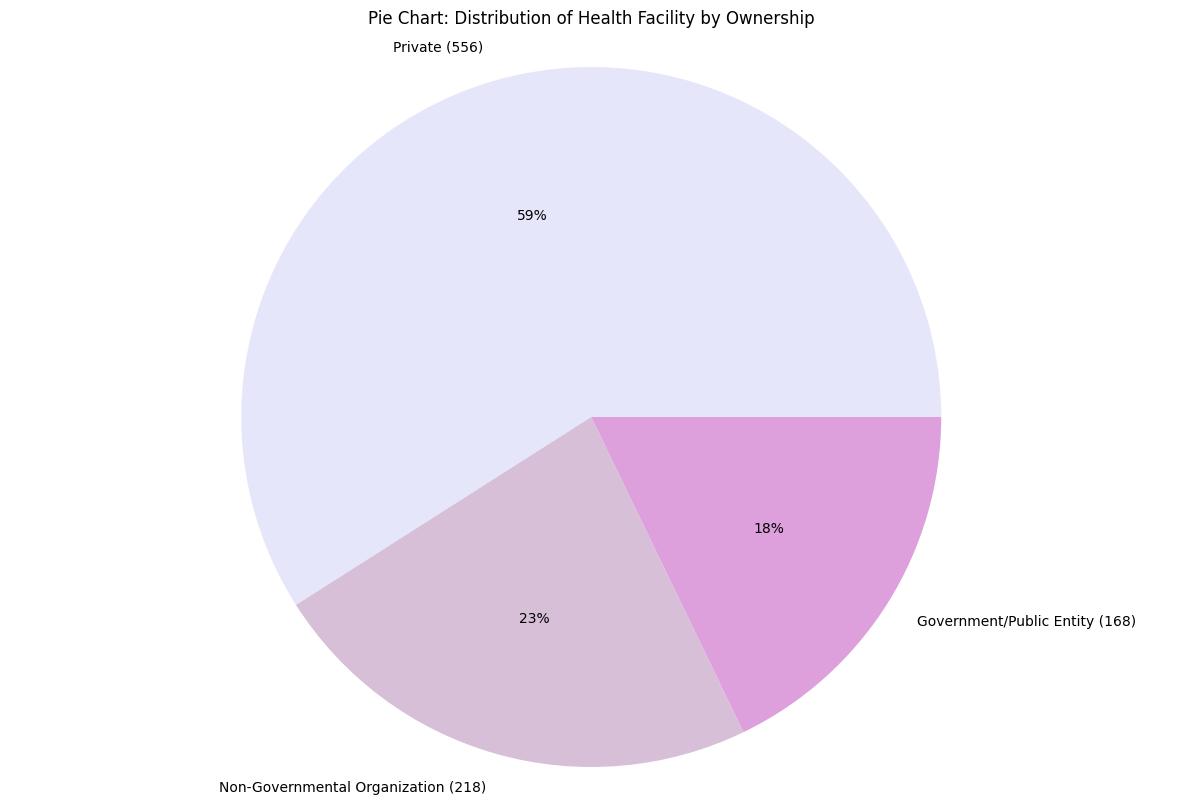

In [25]:
# create value counts for "Owner"
owner_count = df["Owner"].value_counts()

# Plot pie chart
plt.figure(figsize=(15,10))
plt.pie(owner_count, labels=[f"{label} ({count})" for label, count in zip(owner_count.index, owner_count)], autopct="%1.0f%%", colors=colors)
plt.title('Pie Chart: Distribution of Health Facility by Ownership')
plt.axis('equal')  
plt.show()

In [26]:
df["Open 24 Hours"].value_counts()

N    732
Y    199
Name: Open 24 Hours, dtype: int64

Text(0, 0.5, 'Frequency')

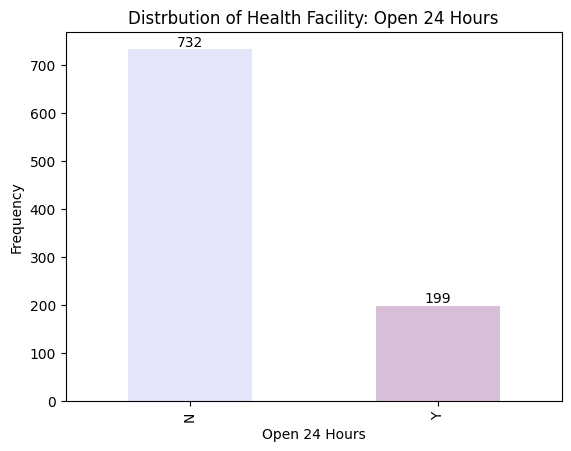

In [27]:
# Create the bar plot
ax = df["Open 24 Hours"].value_counts().plot(kind="bar", color=colors)

# Add labels to each bar
for i in ax.patches:
    # Get the height of the bar
    height = i.get_height()
    # Add text annotation
    ax.text(i.get_x() + i.get_width()/2, height, f"{height}", ha="center", va="bottom")

# Add title and labels
plt.title("Distrbution of Health Facility: Open 24 Hours")
plt.xlabel("Open 24 Hours")
plt.ylabel("Frequency")

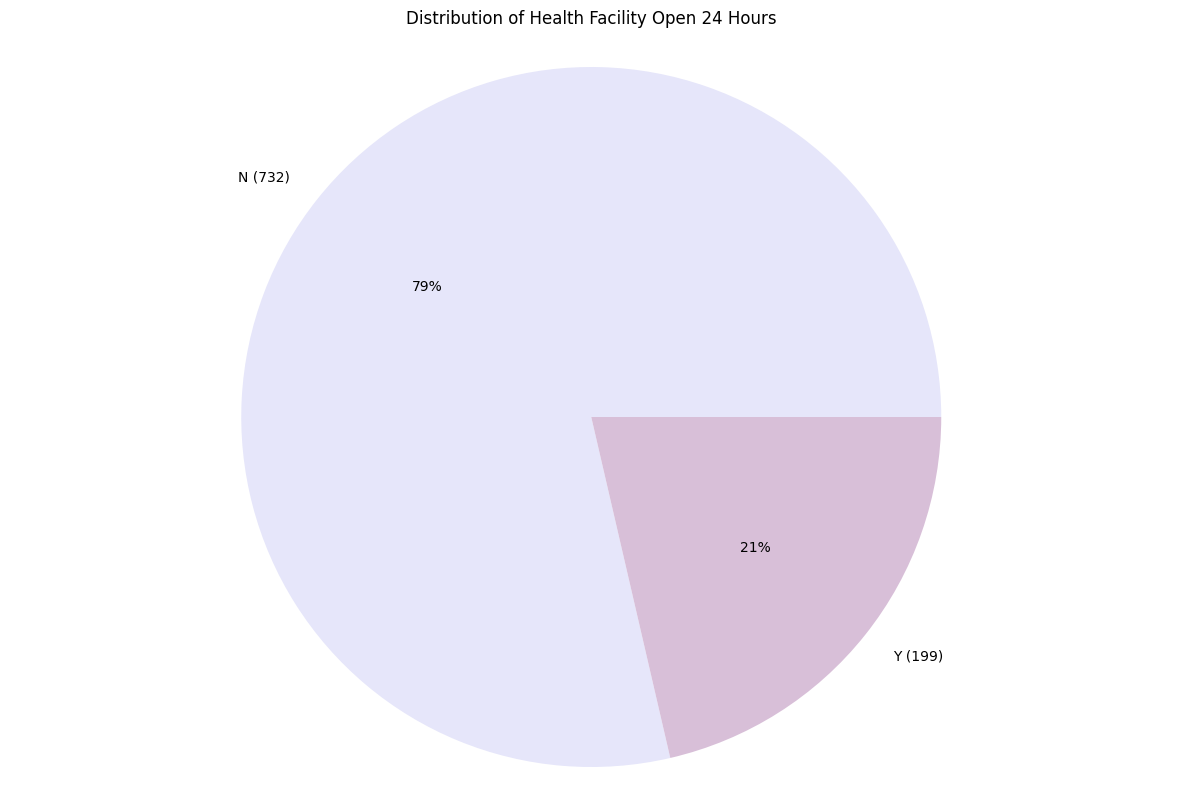

In [28]:
# create value counts for "Open 24 Hours"
open_24hrs_count = df["Open 24 Hours"].value_counts()

# Plot pie chart
plt.figure(figsize=(15,10))
plt.pie(open_24hrs_count, labels=[f"{label} ({count})" for label, count in zip(open_24hrs_count.index, open_24hrs_count)], autopct="%1.0f%%", colors=colors)
plt.title("Distribution of Health Facility Open 24 Hours")
plt.axis("equal")  
plt.show()

In [29]:
df["Open Weekends"].value_counts()

Y    516
N    417
Name: Open Weekends, dtype: int64

Text(0, 0.5, 'Frequency')

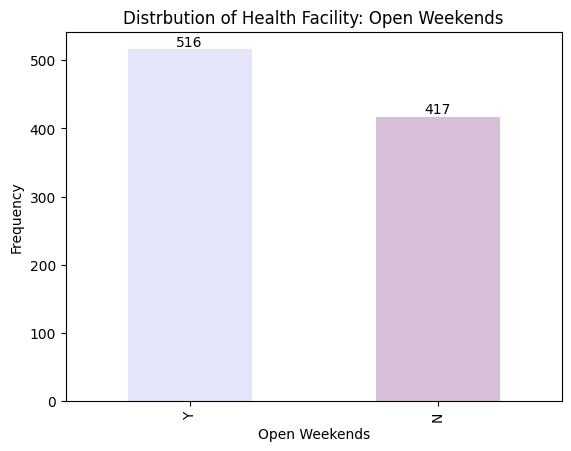

In [30]:
# Create the bar plot
ax = df["Open Weekends"].value_counts().plot(kind="bar", color=colors)

# Add labels to each bar
for i in ax.patches:
    # Get the height of the bar
    height = i.get_height()
    # Add text annotation
    ax.text(i.get_x() + i.get_width()/2, height, f"{height}", ha="center", va="bottom")

# Add title and labels
plt.title("Distrbution of Health Facility: Open Weekends")
plt.xlabel("Open Weekends")
plt.ylabel("Frequency")

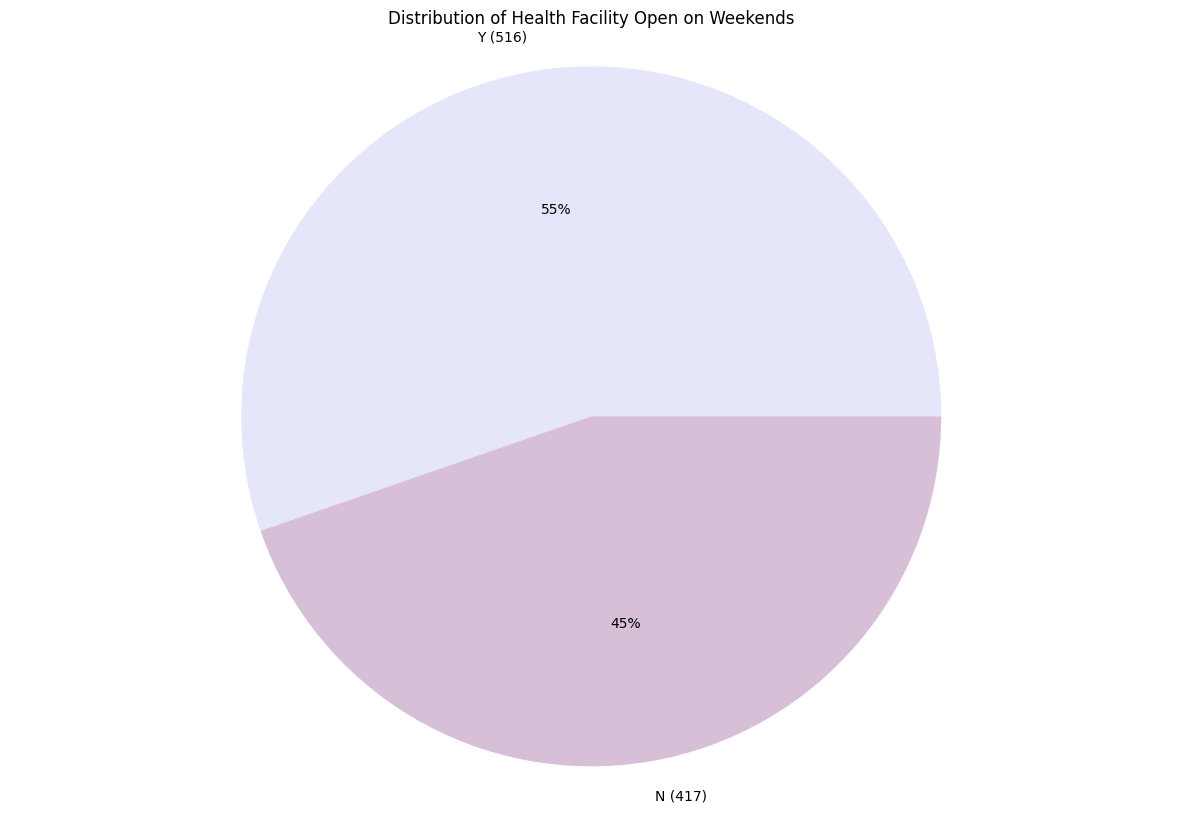

In [31]:
# create value counts for "Open Weekends"
open_weekends_count = df["Open Weekends"].value_counts()

# Plot pie chart
plt.figure(figsize=(15,10))
plt.pie(open_weekends_count, labels=[f"{label} ({count})" for label, count in zip(open_weekends_count.index, open_weekends_count)], autopct="%1.0f%%", colors=colors)
plt.title("Distribution of Health Facility Open on Weekends")
plt.axis("equal")  
plt.show()

In [32]:
df["Operational Status"].value_counts()

Operational        917
Not-Operational     19
Pending Opening      6
Name: Operational Status, dtype: int64

Text(0, 0.5, 'Frequency')

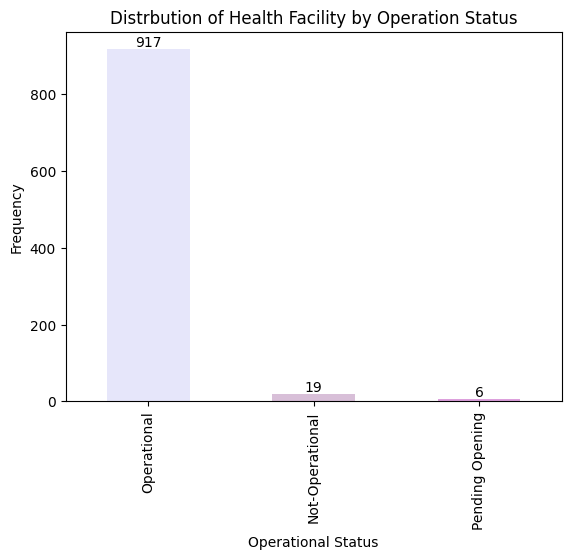

In [33]:
# Create the bar plot
ax = df["Operational Status"].value_counts().plot(kind="bar", color=colors)

# Add labels to each bar
for i in ax.patches:
    # Get the height of the bar
    height = i.get_height()
    # Add text annotation
    ax.text(i.get_x() + i.get_width()/2, height, f"{height}", ha="center", va="bottom")

# Add title and labels
plt.title("Distrbution of Health Facility by Operation Status")
plt.xlabel("Operational Status")
plt.ylabel("Frequency")

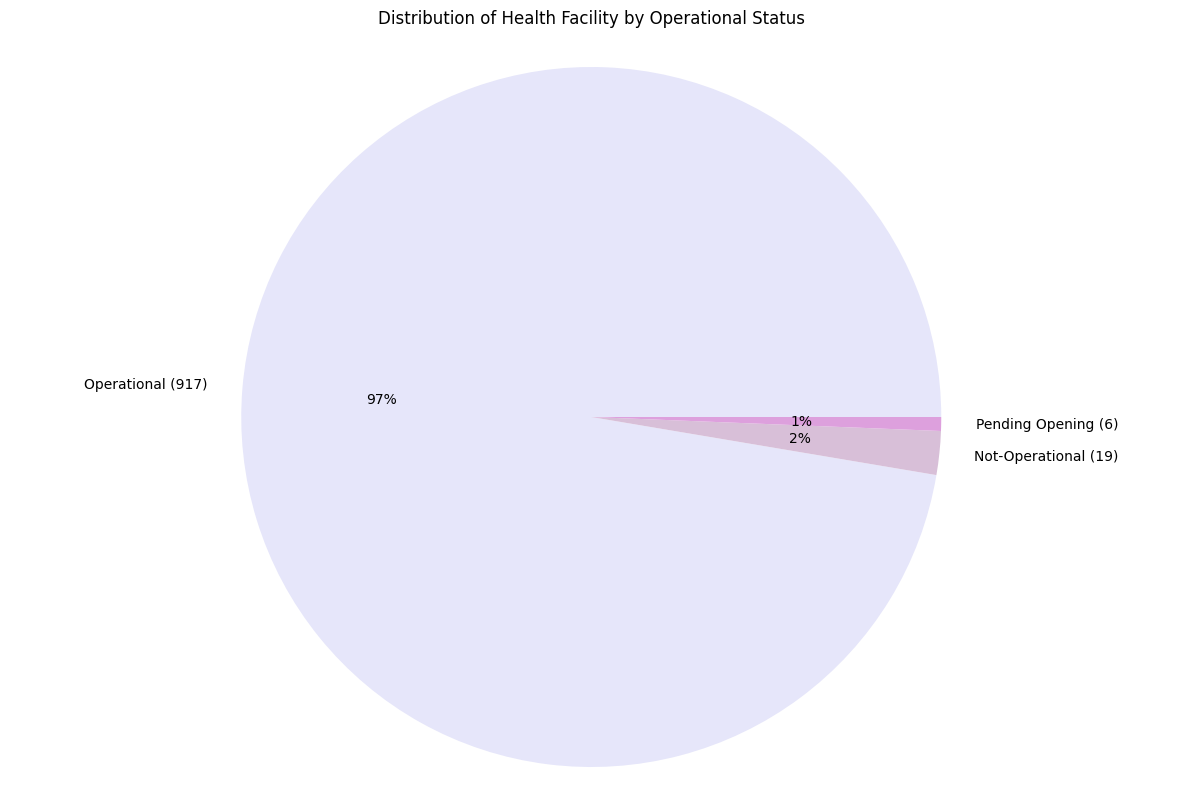

In [34]:
# create value counts for "Operational Status"
operational_status_count = df["Operational Status"].value_counts()

# Plot pie chart
plt.figure(figsize=(15,10))
plt.pie(operational_status_count, labels=[f"{label} ({count})" for label, count in zip(operational_status_count.index, operational_status_count)], autopct="%1.0f%%", colors=colors)
plt.title("Distribution of Health Facility by Operational Status")
plt.axis("equal")  
plt.show()

# POPULATION AND DEMOGRAPHICS

In [35]:
def wrangle(filepath):
    
    # read csv file
    df1=pd.read_csv(filepath)
    
    # rename columns
    df1.rename(columns=df1.iloc[5], inplace =True)
        
    # drop unwanted columns
    df1.drop([0, 1, 2, 3, 4, 5], inplace=True)
    
    # reset index
    df1.reset_index(drop=False, inplace=False, col_level=0)
    
    # change dtypes object to float
    df1["Population"] = df1["Population"].astype(float)
    df1["Land Area (Sq. Km)"] = df1["Land Area (Sq. Km)"].astype(float)
    df1["Population Density (No. per Sq. Km)"] = df1["Population Density (No. per Sq. Km)"].astype(float)
    
    return df1

In [36]:
df1 = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Dalberg Insights\\kenya-populationland-area-population-density_by_subcounty.csv")
print("df1.shape:", df1.shape)
print("df1.info:", df1.info())
df1.head()

df1.shape: (396, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 6 to 401
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   National/ County                     396 non-null    object 
 1   Population                           396 non-null    float64
 2   Land Area (Sq. Km)                   396 non-null    float64
 3   Population Density (No. per Sq. Km)  396 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.5+ KB
df1.info: None


,National/ County,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km)
6,Kenya,47564296.0,580876.3,82.0
7,Mombasa,1208333.0,219.9,5495.0
8,Changamwe,131882.0,17.7,7457.0
9,Jomvu,163415.0,36.9,4432.0
10,Kisauni,291930.0,87.7,3328.0


In [37]:
df1.tail(12)

,National/ County,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km)
390,Nairobi City,4397073.0,703.9,6247.0
391,Dagoretti,434208.0,29.1,14908.0
392,Embakasi,988808.0,86.3,11460.0
393,Kamukunji,268276.0,10.5,25455.0
394,Kasarani,780656.0,86.2,9058.0
395,Kibra .,185777.0,12.1,15311.0
396,Lang'ata,197489.0,216.8,911.0
397,Makadara,189536.0,11.7,16150.0
398,Mathare,206564.0,3.0,68941.0
399,Njiru .,626482.0,129.9,4821.0


## NAIROBI SUB COUNTIES POPULATION

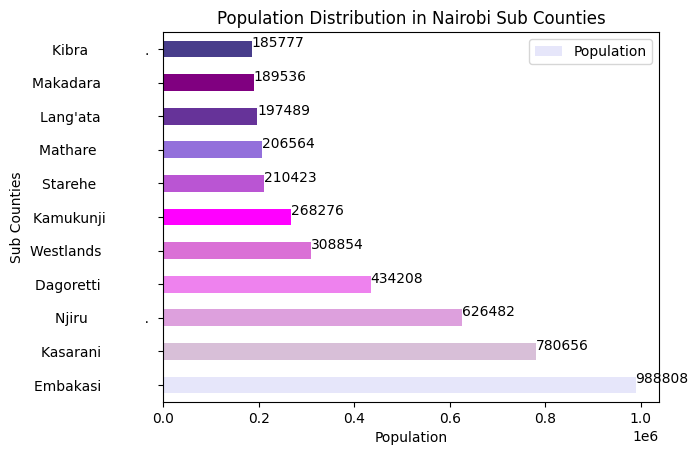

In [38]:
# Create a set of colors
colors = ["#E6E6FA","#D8BFD8","#DDA0DD","#EE82EE","#DA70D6","#FF00FF","#BA55D3","#9370DB","#663399", "#800080", "#483D8B"]
                       
# Sort DataFrame by "Population" column in descending order
df_sorted = df1.tail(11).sort_values(by="Population", ascending=False)
    
# Plot the horizontal bar chart
ax = df_sorted.plot(kind="barh", x="National/ County", y="Population", color=colors)

# Add labels to the bars
for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + 0.3, str(round(i.get_width())), fontsize=10, color='black')
                   
# Add labels and title
plt.xlabel("Population")
plt.ylabel("Sub Counties")
plt.title("Population Distribution in Nairobi Sub Counties")
plt.show();

## NAIROBI SUB COUNTIES LAND AREA COVERAGE

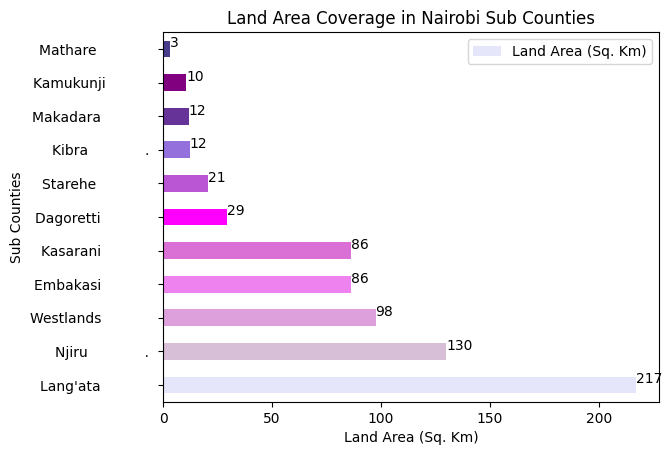

In [39]:
# Sort DataFrame by "Land Area"  in descending order
df_sorted = df1.tail(11).sort_values(by="Land Area (Sq. Km)", ascending=False)
    
# Plot the horizontal bar chart
ax = df_sorted.plot(kind="barh", x="National/ County", y="Land Area (Sq. Km)", color=colors)

# Add labels to the bars
for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + 0.3, str(round(i.get_width())), fontsize=10, color='black')
                   
# Add labels and title
plt.xlabel("Land Area (Sq. Km)")
plt.ylabel("Sub Counties")
plt.title("Land Area Coverage in Nairobi Sub Counties")
plt.show();

## NAIROBI SUB COUNTIES POPULATION DENSITY

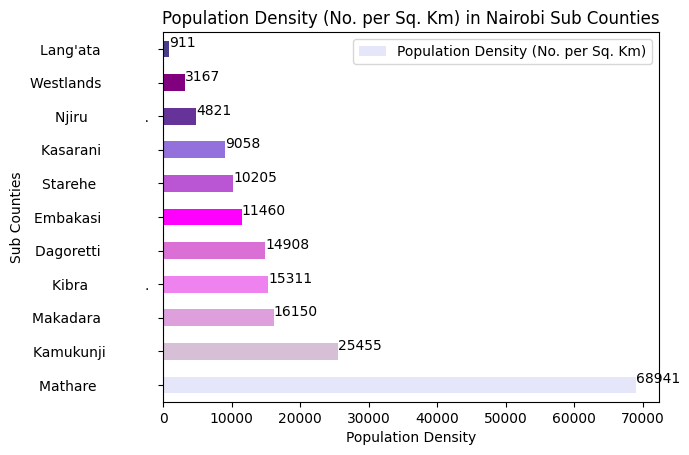

In [40]:
# Sort DataFrame by "Population Density"  in descending order
df_sorted = df1.tail(11).sort_values(by="Population Density (No. per Sq. Km)", ascending=False)
    
# Plot the horizontal bar chart
ax = df_sorted.plot(kind="barh", x="National/ County", y="Population Density (No. per Sq. Km)", color=colors)

# Add labels to the bars
for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + 0.3, str(round(i.get_width())), fontsize=10, color='black')
                   
# Add labels and title
plt.xlabel("Population Density")
plt.ylabel("Sub Counties")
plt.title("Population Density (No. per Sq. Km) in Nairobi Sub Counties")
plt.show();

## NAIROBI POPULATION BY DEMOGRAPHIC

## SEX

In [41]:
def wrangle(filepath):
    
    # read csv file
    df2=pd.read_csv(filepath)
    
    # rename columns
    df2.rename(columns={"Unnamed: 0":"National/County", "Unnamed: 1":"Male", "Unnamed: 2":"Female", "Unnamed: 3":"Intersex", "Unnamed: 4":"Total"}, inplace =True)
        
    # drop unwanted columns
    df2.drop([0, 1, 2, 3, 4, 5], inplace=True)
    
    # reset index
    df2.reset_index(drop=False, inplace=False, col_level=0)
    
    # change dtypes object to float
    df2["Male"] = df2["Male"].astype(float)
    df2["Female"] = df2["Female"].astype(float)
    df2["Intersex"] = df2["Intersex"].astype(float)
    df2["Total"] = df2["Total"].astype(float)
    
    return df2

In [42]:
df2 = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Dalberg Insights\\kenya-population-by-sex-and-county.csv")
print("df2.shape:", df2.shape)
print("df2.info:", df2.info())
df2.head()

df2.shape: (48, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 6 to 53
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   National/County  48 non-null     object 
 1   Male             48 non-null     float64
 2   Female           48 non-null     float64
 3   Intersex         48 non-null     float64
 4   Total            48 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB
df2.info: None


,National/County,Male,Female,Intersex,Total
6,Kenya,23548056.0,24014716.0,1524.0,47564296.0
7,Mombasa,610257.0,598046.0,30.0,1208333.0
8,Kwale,425121.0,441681.0,18.0,866820.0
9,Kilifi,704089.0,749673.0,25.0,1453787.0
10,Tana River,158550.0,157391.0,2.0,315943.0


In [43]:
df2.tail()

,National/County,Male,Female,Intersex,Total
49,Homa Bay,539560.0,592367.0,23.0,1131950.0
50,Migori,536187.0,580214.0,35.0,1116436.0
51,Kisii,605784.0,661038.0,38.0,1266860.0
52,Nyamira,290907.0,314656.0,13.0,605576.0
53,Nairobi,2192452.0,2204376.0,245.0,4397073.0


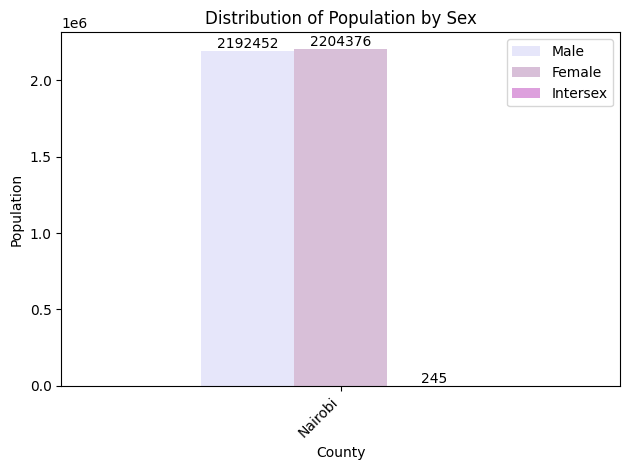

In [44]:
# Sort DataFrame by "Total"  in descending order
df_sorted = df2.tail(1).sort_values(by="Total", ascending=False)
    
# Plot the horizontal bar chart
ax = df_sorted.plot(kind="bar", x="National/County", y=["Male", "Female", "Intersex"], color=colors)

for index, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(round(height)), ha="center", va="bottom", fontsize=10, color="black")
                   
# Add labels and title
plt.xlabel("County")
plt.ylabel("Population")
plt.title("Distribution of Population by Sex")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## NUMBER OF HOUSEHOLDS

In [45]:
def wrangle(filepath):
    
    # read csv file
    df3=pd.read_csv(filepath)
    
    # rename columns
    df3.rename(columns={"Unnamed: 0":"National/County", "Unnamed: 1":"Population", "Unnamed: 2":"No.of Households", "Unnamed: 3":"Avg Household Size", "Unnamed: 4":"Total"}, inplace =True)
        
    # drop unwanted columns
    df3.drop([0, 1, 2, 3, 4, 5], inplace=True)
    
    # reset index
    df3.reset_index(drop=False, inplace=False, col_level=0)
    
    # change dtypes object to float
    df3["Population"] = df3["Population"].astype(float)
    df3["No.of Households"] = df3["No.of Households"].astype(float)
    df3["Avg Household Size"] = df3["Avg Household Size"].astype(float)
        
    return df3

In [46]:
df3 = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Dalberg Insights\\population-houseshold-data.csv")
print("df3.shape:", df3.shape)
print("df3.info:", df3.info())
df3.head()

df3.shape: (48, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 6 to 53
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   National/County     48 non-null     object 
 1   Population          48 non-null     float64
 2   No.of Households    48 non-null     float64
 3   Avg Household Size  48 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB
df3.info: None


,National/County,Population,No.of Households,Avg Household Size
6,Kenya,47213282.0,12143913.0,39.0
7,Mombasa,1190987.0,378422.0,31.0
8,Kwale,858748.0,173176.0,50.0
9,Kilifi,1440958.0,298472.0,48.0
10,Tana River,314710.0,68242.0,46.0


In [47]:
df3.tail()

,National/County,Population,No.of Households,Avg Household Size
49,Homa Bay,1125823.0,262036.0,43.0
50,Migori,1108950.0,240168.0,46.0
51,Kisii,1260509.0,308054.0,41.0
52,Nyamira,603051.0,150669.0,40.0
53,Nairobi,4337080.0,1506888.0,29.0


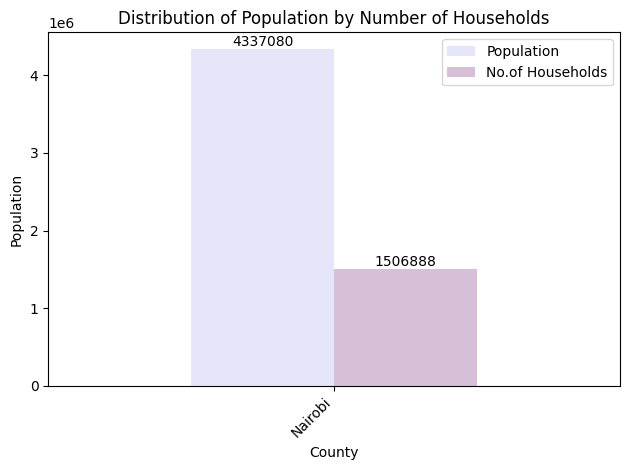

In [48]:
# Sort DataFrame by "No.of Households"  in descending order
df_sorted = df3.tail(1).sort_values(by="No.of Households", ascending=False)
    
# Plot the horizontal bar chart
ax = df_sorted.plot(kind="bar", x="National/County", y=["Population", "No.of Households"], color=colors)

for index, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(round(height)), ha="center", va="bottom", fontsize=10, color="black")
                   
# Add labels and title
plt.xlabel("County")
plt.ylabel("Population")
plt.title("Distribution of Population by Number of Households")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## AGE

In [49]:
def wrangle(filepath):
    
    # read csv file
    df4=pd.read_csv(filepath)
    
    # rename columns
    df4.rename(columns={"MOMBASA":"Age", "Unnamed: 2":"Male", "Unnamed: 3":"Female", "Unnamed: 4":"Total"}, inplace =True)
        
    # drop unwanted columns
    df4.drop([0], inplace=True)
    
    # remove "," nad whitepscaes
    df4["Male"] = df4["Male"].str.replace(",", "", regex=False).str.replace("-", "").str.replace(" ", "")
    df4["Female"] = df4["Female"].str.replace(",", "", regex=False).str.replace("-", "").str.replace(" ", "")
    df4["Total"] = df4["Total"].str.replace(",", "", regex=False).str.replace("-", "").str.replace(" ", "")
    
    # convert object to float
    df4["Male"] = pd.to_numeric(df4["Male"], errors='coerce')
    df4["Female"] = pd.to_numeric(df4["Female"], errors='coerce')
    df4["Total"] = pd.to_numeric(df4["Total"], errors='coerce')
    
    # drop null values
    df4.dropna(inplace=True)
    
    return df4

In [50]:
df4 = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Dalberg Insights\\distribution-of-urban-population-by-age-sex-and-county-kenya-2019-census-volume-iii.csv")
print("df4.shape:", df4.shape)
print("df4.info:", df4.info())
df4.head()

df4.shape: (5470, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5470 entries, 1 to 5765
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COUNTY  5470 non-null   object 
 1   Age     5470 non-null   object 
 2   Male    5470 non-null   float64
 3   Female  5470 non-null   float64
 4   Total   5470 non-null   float64
dtypes: float64(3), object(2)
memory usage: 256.4+ KB
df4.info: None


,COUNTY,Age,Male,Female,Total
1,MOMBASA,Total,610257.0,598046.0,1208303.0
2,MOMBASA,0,15111.0,15009.0,30120.0
3,MOMBASA,1,15805.0,15308.0,31113.0
4,MOMBASA,2,15088.0,14837.0,29925.0
5,MOMBASA,3,14660.0,14031.0,28691.0


In [51]:
df4.tail(123)

,COUNTY,Age,Male,Female,Total
5643,NAIROBI CITY,Total,2192452.0,2204376.0,4396828.0
5644,NAIROBI CITY,0,57265.0,56523.0,113788.0
5645,NAIROBI CITY,1,56019.0,54601.0,110620.0
5646,NAIROBI CITY,2,52518.0,51848.0,104366.0
5647,NAIROBI CITY,3,51115.0,51027.0,102142.0
...,...,...,...,...,...
5761,NAIROBI CITY,98,16.0,34.0,50.0
5762,NAIROBI CITY,99,16.0,66.0,82.0
5763,NAIROBI CITY,95-99,115.0,319.0,434.0
5764,NAIROBI CITY,100+,35.0,171.0,206.0


In [52]:
df_nairobi = df4.iloc[5347:]
df_nairobi.head()

,COUNTY,Age,Male,Female,Total
5643,NAIROBI CITY,Total,2192452.0,2204376.0,4396828.0
5644,NAIROBI CITY,0,57265.0,56523.0,113788.0
5645,NAIROBI CITY,1,56019.0,54601.0,110620.0
5646,NAIROBI CITY,2,52518.0,51848.0,104366.0
5647,NAIROBI CITY,3,51115.0,51027.0,102142.0


In [53]:
df_nairobi["Age"].unique()

array(['Total', '0', '1', '2', '3', '4', '0 - 4', '5', '6', '7', '8', '9',
       'CD LO', '10', '11', '12', '13', '14', '10-14', '15', '16', '17',
       '18', '19', '15-19', '20', '21', '22', '23', '24', '20-24', '25',
       '26', '27', '28', '29', '25-29', '30', '31', '32', '33', '34',
       '30-34', '35', '36', '37', '38', '39', '35-39', '40', '41', '42',
       '43', '44', '40-44', '45', '46', '47', '48', '49', '45-49', '50',
       '51', '52', '53', '54', '50-54', '55', '56', '57', '58', '59',
       '55-59', '60', '61', '62', '63', '64', '60-64', '65', '66', '67',
       '68', '69', '65-69', '70', '71', '72', '73', '74', '70-74', '75',
       '76', '77', '78', '79', '75-79', '80', '81', '82', '83', '84',
       '80-84', '85', '86', '87', '88', '89', '85-89', '90', '91', '92',
       '93', '94', '90-94', '95', '96', '97', '98', '99', '95-99', '100+',
       'Not Stated'], dtype=object)

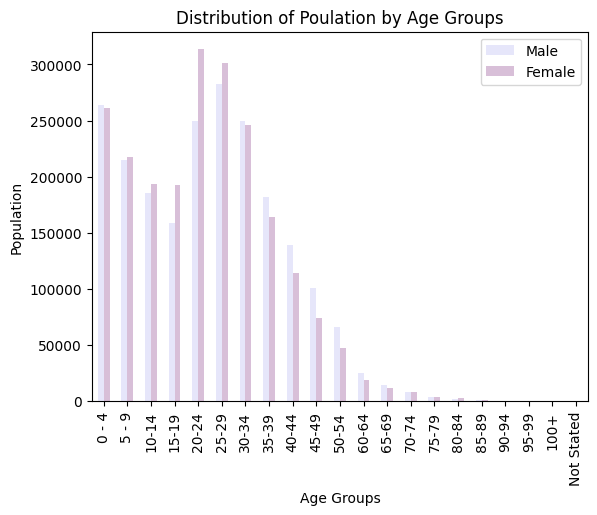

In [54]:
# Replace "CD LO" with "5-9"
df_nairobi.loc[df_nairobi["Age"] == "CD LO", "Age"] = "5 - 9"

# Filter data for specific points
specific_points = df_nairobi[df_nairobi["Age"].isin(["0 - 4","5 - 9","10-14", "15-19","20-24","25-29",
                                                     "30-34","35-39","40-44","45-49","50-54","50-54",
                                                     "60-64","65-69","70-74","75-79","80-84","85-89",
                                                     "90-94","95-99","100+","Not Stated"])]
# Plot bar chart
specific_points.plot(kind="bar", x="Age", y=["Male", "Female"], color=colors)
plt.xlabel("Age Groups")
plt.ylabel("Population")
plt.title("Distribution of Poulation by Age Groups")
plt.show();